In [2]:
import random
import pandas as pd
import numpy as np
import os

# 사이킷런에서 랜덤포레스트 모델 불러오기
from sklearn.ensemble import RandomForestRegressor

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings(action='ignore') 

In [34]:
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(그래프가 화면에 뜨지 않을 때)
%matplotlib inline

# 그래프(figure)에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정(나눔고딕체)
plt.rc('font', family='NanumGothic')

# 조용하 강사님이 올려주신 코드(한글화-matplotlib)
import koreanize_matplotlib

## 시계열 분해

### 무작위로 생성된 시계열 데이터

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
# 무작위로 생성된 시계열 데이터 생성
np.random.seed(0)
date_rng = pd.date_range(start='2023-01-01', end='2024-12-31', freq='W')
data = np.random.randn(len(date_rng))  # 무작위 데이터 생성
ts = pd.Series(data, index=date_rng)

# 데이터를 DataFrame으로 변환
df = pd.DataFrame({'value': ts})

In [11]:
df.head(2)

,value
2023-01-01,1.764052
2023-01-08,0.400157


In [12]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

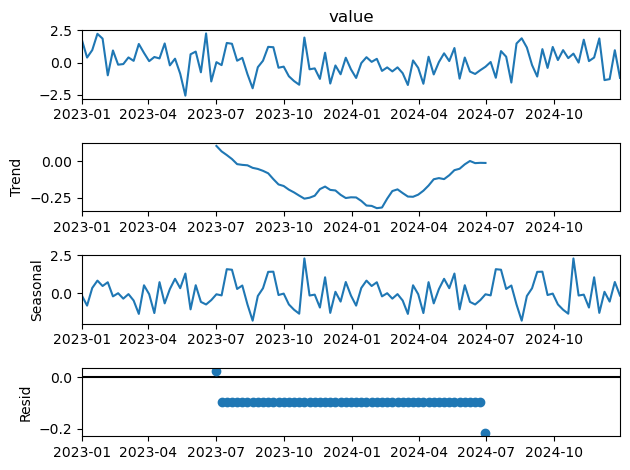

In [13]:
# 추세, 계절성, 잔차를 출력
#print("Trend:\n", trend)
#print("Seasonal:\n", seasonal)
#print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()


In [16]:
# AR 모델 파라미터 설정
phi = 0.7  # 자기회귀 계수

# 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
error = np.random.normal(0, 1, n)  # 랜덤 에러 항
data = np.zeros(n)

for t in range(1, n):
    data[t] = phi * data[t-1] + error[t]

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')
df = pd.DataFrame({'value': data}, index=date_rng)

In [17]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

Trend:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    1.849417
2023-01-05    2.052992
                ...   
2023-04-06    1.815362
2023-04-07    1.894303
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: trend, Length: 100, dtype: float64
Seasonal:
 date
2023-01-01   -0.368460
2023-01-02    0.335353
2023-01-03    0.621831
2023-01-04    0.296623
2023-01-05    0.113698
                ...   
2023-04-06    0.113698
2023-04-07   -0.229511
2023-04-08   -0.769535
2023-04-09   -0.368460
2023-04-10    0.335353
Freq: D, Name: seasonal, Length: 100, dtype: float64
Residual:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    0.976047
2023-01-05    1.886329
                ...   
2023-04-06   -0.060381
2023-04-07   -0.346217
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: resid, Length: 100, dtype: float64


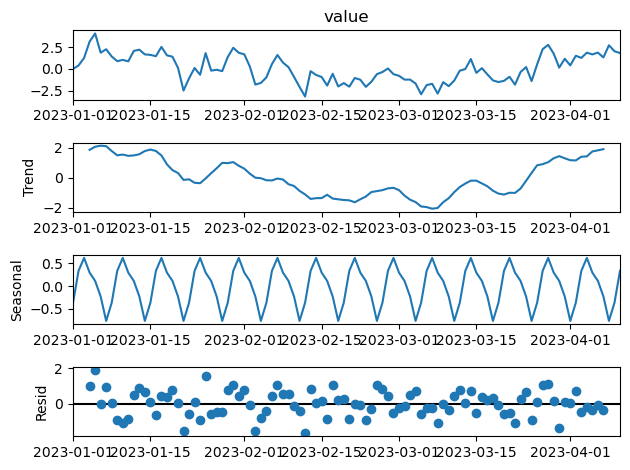

In [18]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()

In [19]:
# 주기가 일정한 데이터
# 시계열 데이터 생성
np.random.seed(0)
n = 36  # 데이터 포인트 수 (3년치 데이터, 매월 데이터)
seasonal_period = 12  # 계절성 주기 (12개월)

# 계절성 구성 요소 생성 (매월 데이터)
seasonal_component = np.sin(2 * np.pi * np.arange(n) / seasonal_period)

# 랜덤 에러 항
error = np.random.normal(0, 1, n)

# 시계열 데이터 = 계절성 + 에러
data = seasonal_component + error

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='M')
df = pd.DataFrame({'value': data}, index=date_rng)

In [20]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

Trend:
 date
2023-01-31         NaN
2023-02-28         NaN
2023-03-31         NaN
2023-04-30         NaN
2023-05-31         NaN
2023-06-30         NaN
2023-07-31    0.706420
2023-08-31    0.653024
2023-09-30    0.619135
2023-10-31    0.517381
2023-11-30    0.422352
2023-12-31    0.438962
2024-01-31    0.444591
2024-02-29    0.388767
2024-03-31    0.257413
2024-04-30    0.165465
2024-05-31    0.205607
2024-06-30    0.144105
2024-07-31    0.115450
2024-08-31    0.112645
2024-09-30    0.030389
2024-10-31   -0.007901
2024-11-30   -0.027991
2024-12-31    0.043393
2025-01-31    0.106576
2025-02-28    0.151332
2025-03-31    0.272059
2025-04-30    0.231676
2025-05-31    0.071394
2025-06-30    0.058317
2025-07-31         NaN
2025-08-31         NaN
2025-09-30         NaN
2025-10-31         NaN
2025-11-30         NaN
2025-12-31         NaN
Freq: M, Name: trend, dtype: float64
Seasonal:
 date
2023-01-31    1.202687
2023-02-28   -0.473520
2023-03-31    0.808975
2023-04-30    0.837549
2023-05-31    

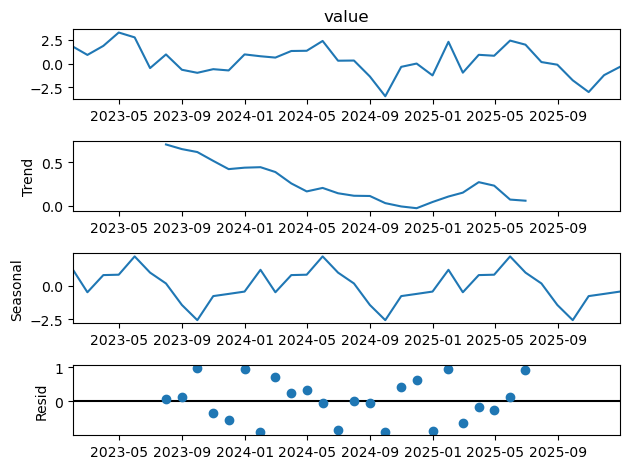

In [21]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()

In [22]:
# 선형적 트렌드
# 선형적 트렌드를 가진 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
t = np.arange(n)  # 시간 변수
linear_trend = 0.5 * t  # 선형 트렌드
error = np.random.normal(0, 1, n)  # 랜덤 에러 항

# 시계열 데이터 = 선형 트렌드 + 에러
data = linear_trend + error

# 데이터를 DataFrame으로 변환
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')
df = pd.DataFrame({'value': data}, index=date_rng)

In [23]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(df['value'], model='additive')

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

Trend:
 date
2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04     2.532030
2023-01-05     2.758400
                ...    
2023-04-06    48.095877
2023-04-07    48.623550
2023-04-08          NaN
2023-04-09          NaN
2023-04-10          NaN
Freq: D, Name: trend, Length: 100, dtype: float64
Seasonal:
 date
2023-01-01    0.169095
2023-01-02    0.592155
2023-01-03    0.385964
2023-01-04   -0.112572
2023-01-05   -0.095058
                ...   
2023-04-06   -0.095058
2023-04-07   -0.310220
2023-04-08   -0.629364
2023-04-09    0.169095
2023-04-10    0.592155
Freq: D, Name: seasonal, Length: 100, dtype: float64
Residual:
 date
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    1.321435
2023-01-05    1.204216
                ...   
2023-04-06    0.205755
2023-04-07   -0.302831
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
Freq: D, Name: resid, Length: 100, dtype: float64


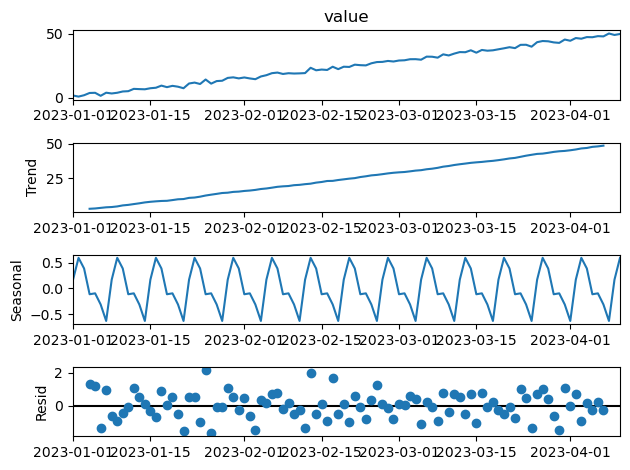

In [24]:
# 추세, 계절성, 잔차를 출력
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)

# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()

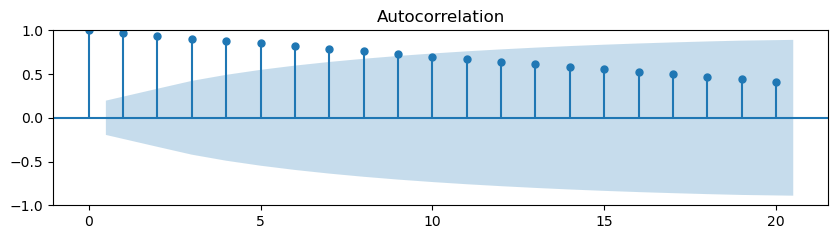

In [26]:
import statsmodels.api as sm

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['value'], lags = 20, ax = ax1)

## 전력데이터 활용

### 시계열 분해

In [27]:
train=pd.read_csv('train.csv',encoding='cp949')

In [29]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

#### 1번 건물

In [36]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date_time'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(train[train['num']==1]['전력사용량(kWh)'], model='additive',period=24)

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid

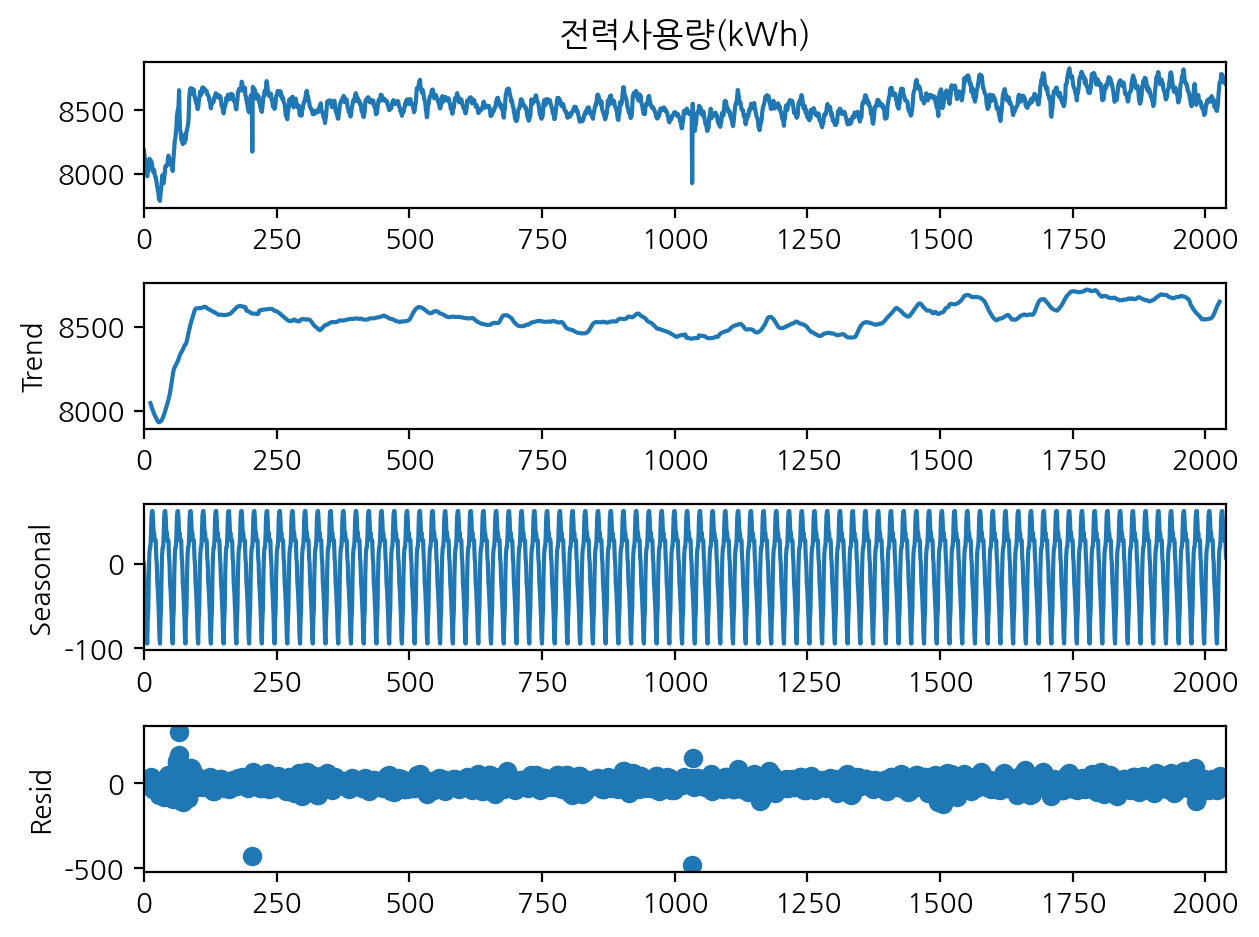

In [38]:
# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()

In [3]:
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')

In [4]:
# 컬럼명 변환을 위한 리스트 할당
train_col = ['num', 'date_time', 'power', 'temp', 'wind', 'hum', 'rain', 'sun', 'cooler', 'solar']
test_col = ['num', 'date_time', 'temp', 'wind', 'hum', 'rain', 'sun', 'cooler', 'solar']
train.columns=train_col
test.columns=test_col

<Figure size 640x480 with 0 Axes>

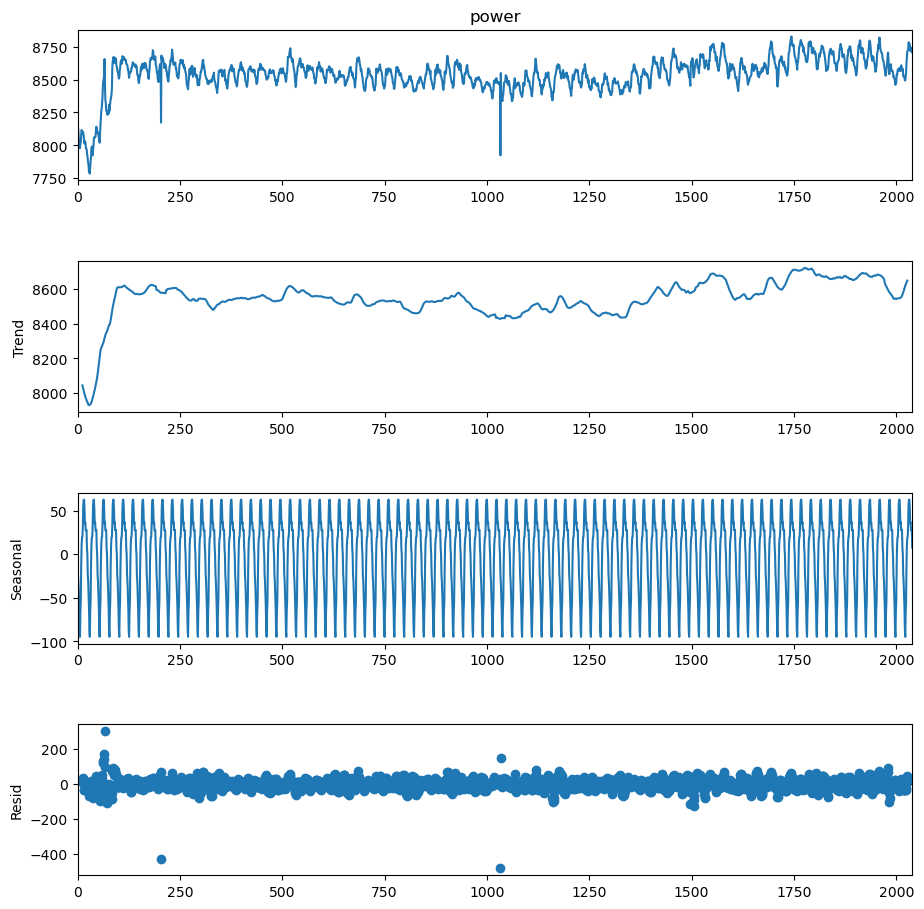

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(train[train['num']==1]['power'], 
                            model = 'additive', 
                            period = 24)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

#### acf, pacf

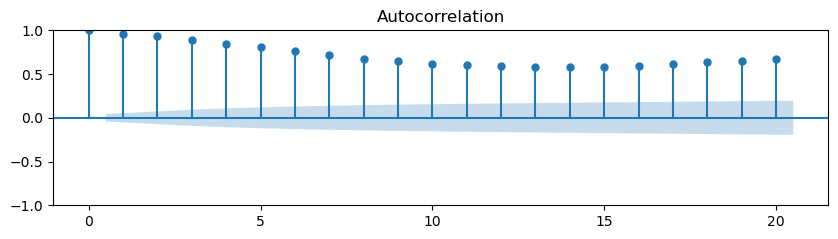

In [7]:
import statsmodels.api as sm

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train[train['num']==1]['power'], lags = 20, ax = ax1)

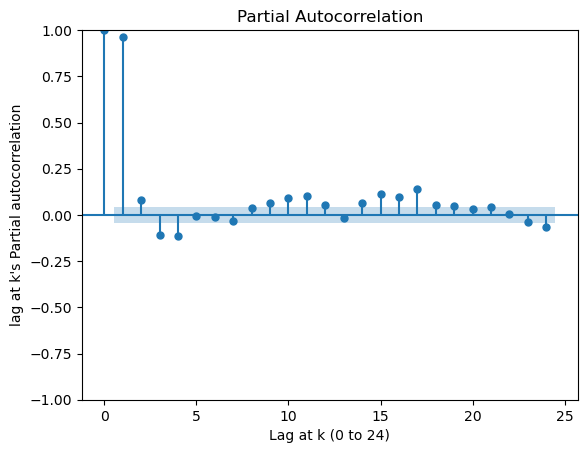

In [8]:
def pacf_plot(data, N_LAGS, pval):
    from statsmodels.graphics.tsaplots import plot_pacf
    
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()

pacf_plot(train[train['num']==1]['power'], 24, 0.05)

#### 2번 건물

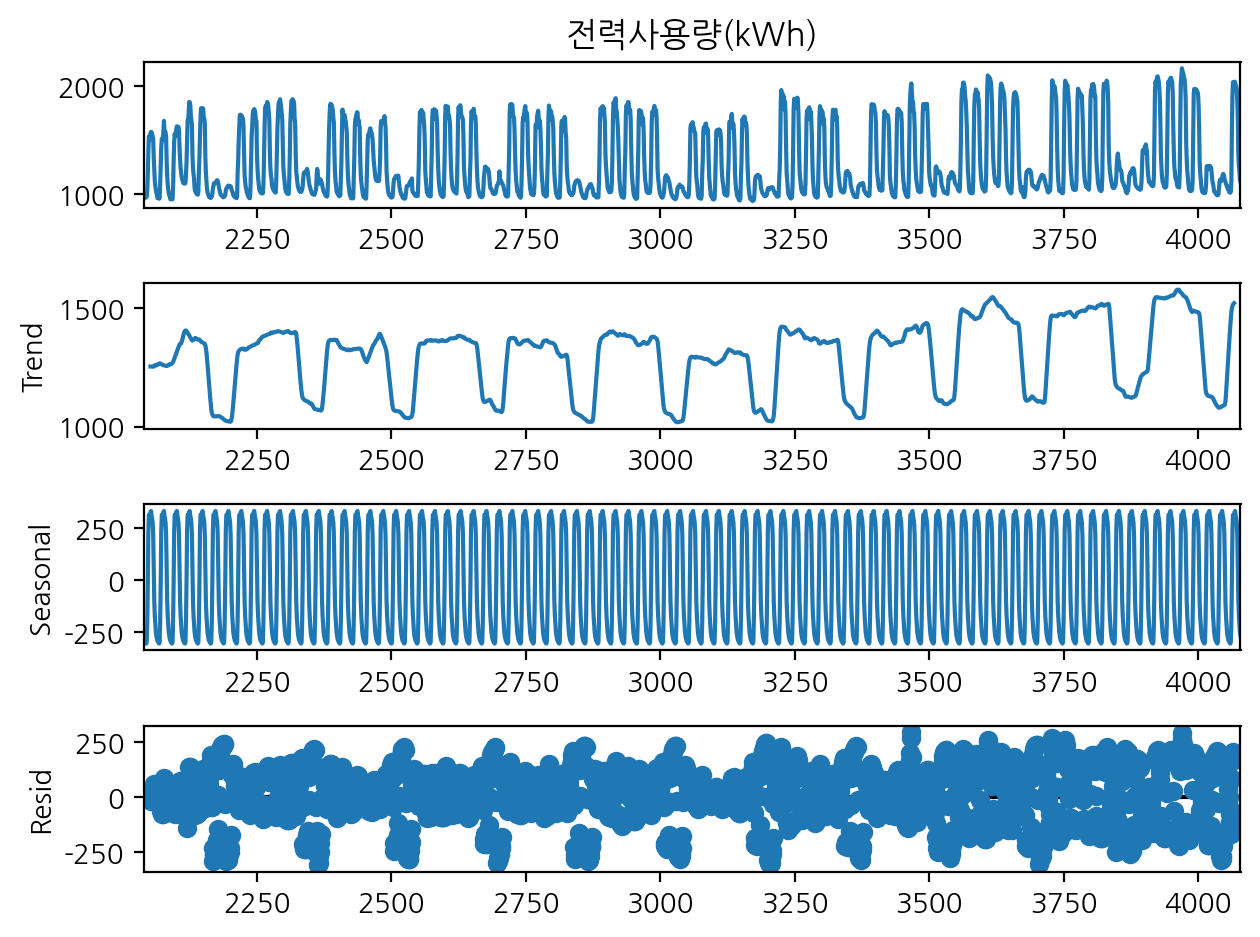

In [39]:
# 'date' 열을 인덱스로 설정
df.index.name = 'date_time'

# 시계열 분해 수행
result = sm.tsa.seasonal_decompose(train[train['num']==2]['전력사용량(kWh)'], model='additive',period=24)

# 추세, 계절성, 잔차 추출
trend = result.trend
seasonal = result.seasonal
residual = result.resid
# 시계열 분해 결과 그래프로 시각화
result.plot()
plt.show()

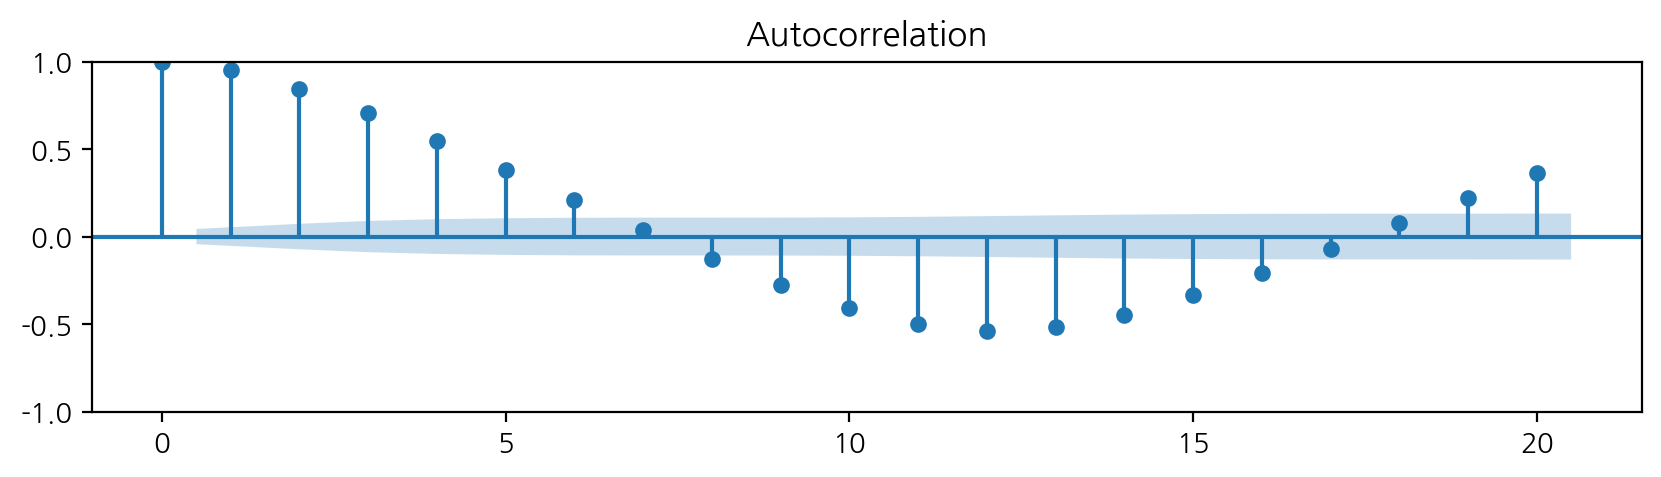

<Figure size 1000x500 with 0 Axes>

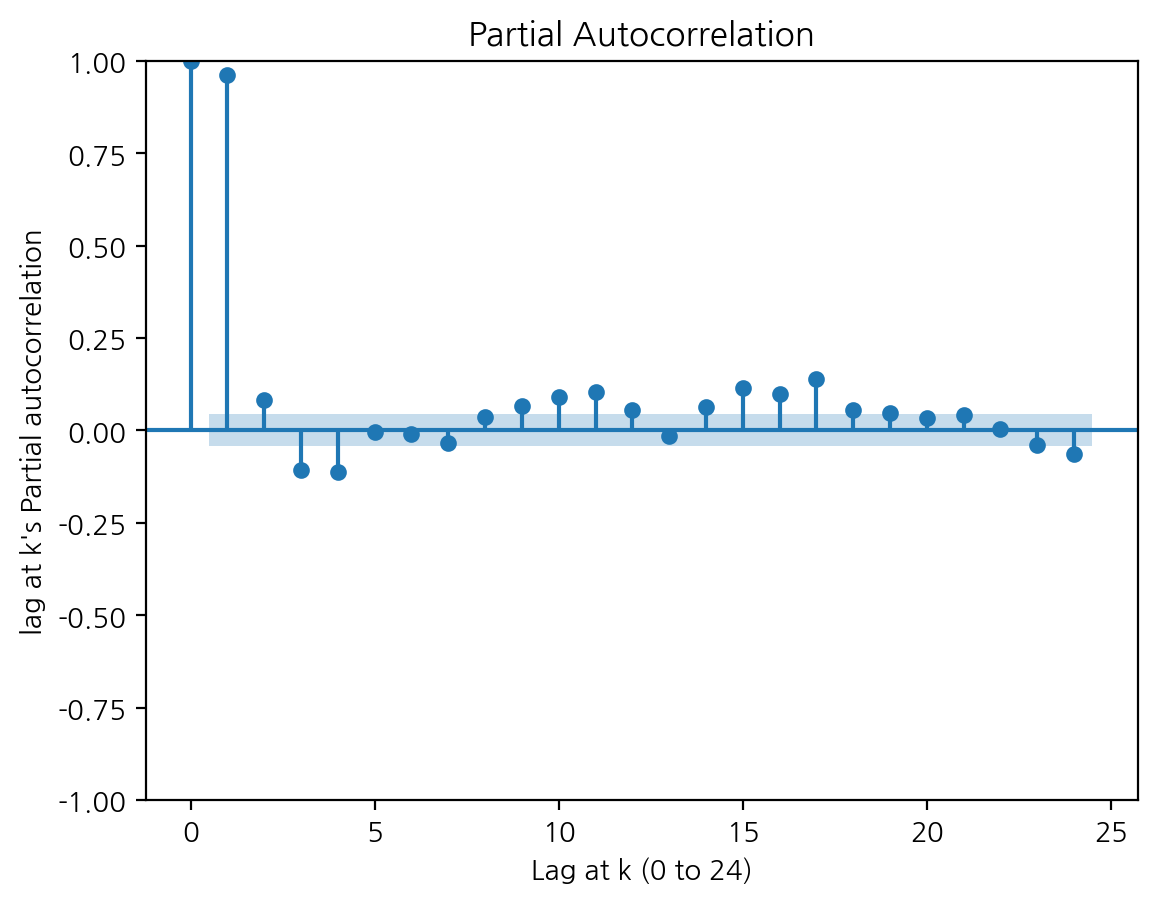

In [45]:
### acf, pacf
import statsmodels.api as sm

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train[train['num']==2]['전력사용량(kWh)'], lags = 20, ax = ax1)
def pacf_plot(data, N_LAGS, pval):
    from statsmodels.graphics.tsaplots import plot_pacf
    
    plot_pacf(data, lags=N_LAGS, alpha=pval, method='ywm')
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's Partial autocorrelation")
    plt.show()

plt.figure(figsize = (10,5))
pacf_plot(train[train['num']==1]['전력사용량(kWh)'], 24, 0.05)
plt.show()